In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/ds_salaries.csv') #route to the file s
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


## DATA CLEANING & PREPROCESSING

In [3]:
df.columns #NAME OF THE COLUMNS

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
df.dtypes #UNDERSTAND THE TYPE OF DATA OF EACH COLUMN

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.isnull().sum() #CHECK FOR NULLS

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.duplicated().sum() #CHECK DUPLICATES

np.int64(1171)

In [7]:
df.shape[0] #THERE WERE 1171 DUPLICATED, HERE I SEE THERE WERE 3755 INITIAL LINES

3755

In [8]:
df.drop_duplicates(inplace=True) #DELETE DUPLICATES SO THEY DONT MESS UP THE DATA. 

In [9]:
df.duplicated().sum() #CHECK IF DELETE WAS CORRECT

np.int64(0)

In [10]:
df.shape[0] #HOW IS THE DATASET NOW?

2584

## EDA


### WHAT IS THE TYPE OF EMPLOYMENT WITH HIGHER SALARY? 

Code solution: 

In [11]:
#first I take the average salary per joh title descending so we can see what are the biggest
average_salary = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).round(2)
average_salary

job_title
Head of Machine Learning          6000000.00
Principal Data Architect          3000000.00
Lead Machine Learning Engineer    2548666.67
Lead Data Scientist                928485.33
Data Analytics Lead                922500.00
                                     ...    
Insight Analyst                     38500.00
Compliance Data Analyst             30000.00
Autonomous Vehicle Technician       26277.50
Staff Data Analyst                  15000.00
Product Data Scientist               8000.00
Name: salary, Length: 93, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualization:

In [13]:
#to start with the graph we need to do a small changes, and set the data to df. and reset the index 
avg_salary_df = pd.DataFrame(average_salary).reset_index()
avg_salary_df.columns = ['job_title', 'salary']

#as there are many job titles, I make a top 10 selection and makr sure it's correct with the head 
top10_salaries = df.nlargest(10, 'salary')
top10_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
3574,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3646,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3475,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
2966,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
3476,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
2358,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
3192,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
1462,2023,MI,FT,Head of Data Science,5000000,INR,60795,IN,50,IN,L


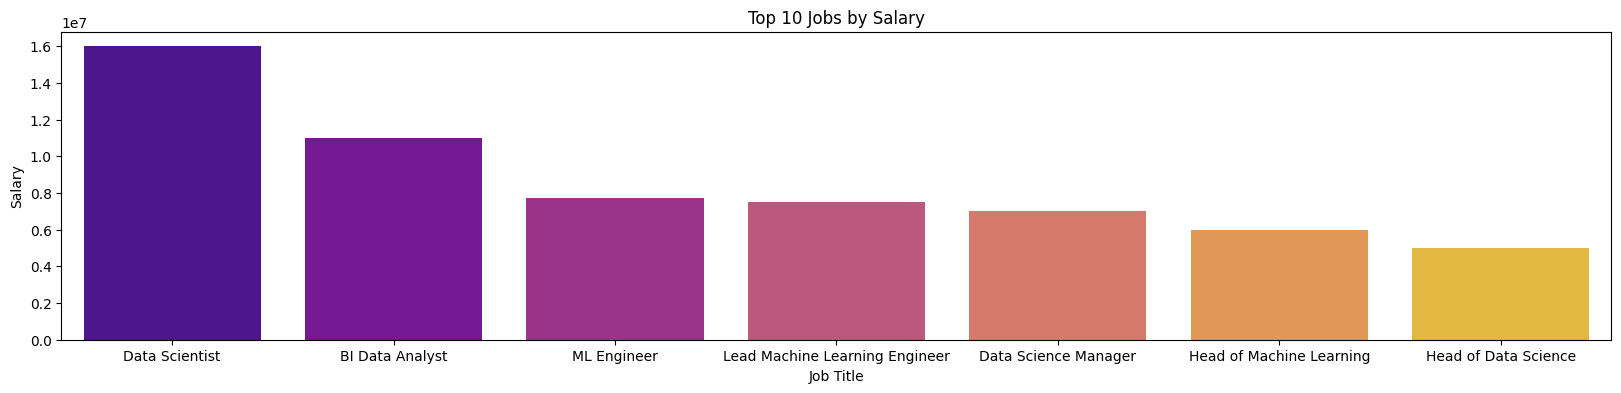

In [14]:
#build the graph, barplot with previous top 10
fig = plt.figure(figsize=(20, 4))
sns.barplot(x='job_title',y='salary',data=top10_salaries, palette='plasma', hue='job_title', errorbar=None)
plt.xticks(rotation=0)
plt.title('Top 10 Jobs by Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.savefig('Top 10 salaries.png')
plt.show()

### WHERE ARE LOCATED THE COMPANIES THAT OFFER HIGHER SALARIES?

In [15]:
df['salary'].max()

np.int64(30400000)

In [16]:
salario_medio_por_ubicacion = df.groupby('company_location')['salary'].mean()

ubicacion_empresa_mayor_salario = salario_medio_por_ubicacion.idxmax()

salario_maximo = salario_medio_por_ubicacion.max()

print(f'Las empresas que más pagan están ubicadas en {ubicacion_empresa_mayor_salario} siendo el salario mayor de {salario_maximo}')

Las empresas que más pagan están ubicadas en CL siendo el salario mayor de 30400000.0


Visualization:
We do the salary with the previous Top 10 salaries, now we compare with company location. 

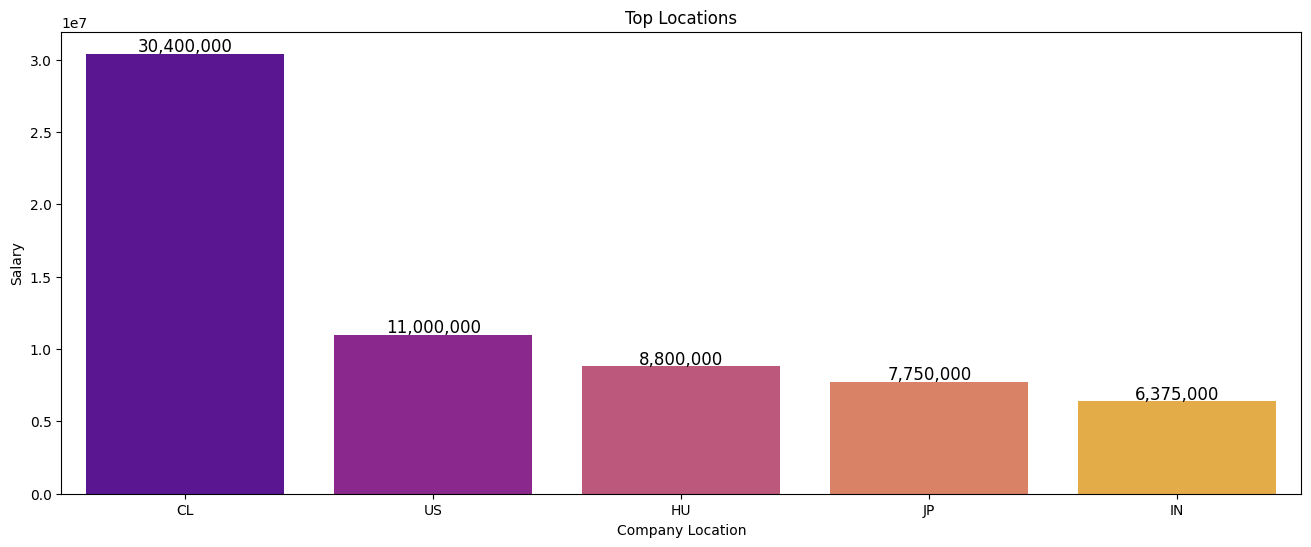

In [17]:
df_salario_medio = pd.DataFrame(salario_medio_por_ubicacion)
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(x='company_location', y='salary', data=top10_salaries, palette='plasma', hue='company_location', errorbar=None)

# Añadir el valor del mayor salario dentro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                ha='center', 
                va='center',  # Alineación vertical del texto
                fontsize=12, 
                color='black', 
                xytext=(0, 5),  # Mueve el texto hacia arriba
                textcoords='offset points')

# Añadir títulos y etiquetas
plt.title('Top Locations')
plt.xlabel('Company Location')
plt.ylabel('Salary')

plt.show()


### WHAT TYPE OF EMPLOYMENT HAS BIGGEST REMOTE RATIO?

In [18]:
df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [19]:
remote_ratio_df = pd.DataFrame(df[df['remote_ratio'] == 100]['job_title'].value_counts()).reset_index()
remote_ratio_df

,job_title,count
0,Data Engineer,287
1,Data Scientist,237
2,Data Analyst,194
3,Machine Learning Engineer,90
4,Analytics Engineer,50
...,...,...
70,BI Data Engineer,1
71,Applied Machine Learning Engineer,1
72,Compliance Data Analyst,1
73,Data Quality Analyst,1


To visualize it, I take the % vs the total. As there are many job titles, I take a top 20 selection

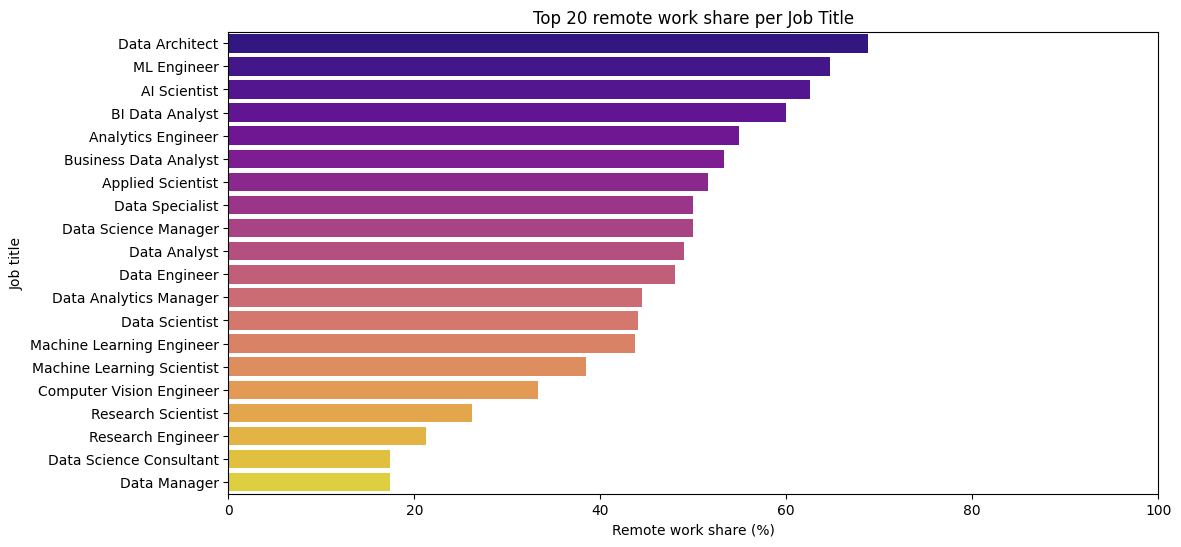

In [20]:
# Paso 1: Calcular el total de trabajos por título
total_jobs_df = df['job_title'].value_counts().reset_index()
total_jobs_df.columns = ['job_title', 'total_jobs']  # Renombrar columnas

# Paso 2: Calcular el número de trabajos remotos
remote_jobs_df = pd.DataFrame(df[df['remote_ratio'] == 100]['job_title'].value_counts()).reset_index()
remote_jobs_df.columns = ['job_title', 'remote_jobs']  # Renombrar columnas

# Paso 3: Unir ambos DataFrames
merged_df = pd.merge(total_jobs_df, remote_jobs_df, on='job_title', how='left').fillna(0)

# Paso 4: Calcular el porcentaje de trabajos remotos
merged_df['remote_ratio_percentage'] = (merged_df['remote_jobs'] / merged_df['total_jobs']) * 100

# Paso 5: Filtrar los 20 títulos de trabajo más comunes
top_20_jobs = merged_df.nlargest(20, 'total_jobs')

# Paso 6: Ordenar en orden ascendente por el porcentaje de trabajos remotos
top_20_jobs = top_20_jobs.sort_values(by='remote_ratio_percentage', ascending=False)

# Paso 7: Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio_percentage', y='job_title', data=top_20_jobs, palette='plasma')
plt.title('Top 20 remote work share per Job Title')
plt.xlabel('Remote work share (%)')
plt.ylabel('Job title')
plt.xlim(0, 100)  # Ajustar el límite del eje x
plt.show()


### AVERAGE SALARY FOR DATA SCIENTIST

In [21]:
data_scientist = df[df['job_title'] == 'Data Scientist'] #primero saco el numero de data scientists, si el job title coincide
salario_medio = data_scientist['salary'].mean() #despues saco la media del salario de ese grupo
salario_medio

np.float64(286453.71375464683)

In [22]:
data_scientist_df = df[df['job_title'] == 'Data Scientist']

Visualization: 
we compare avg salary from Data Scientist Vs the rest of the job titles

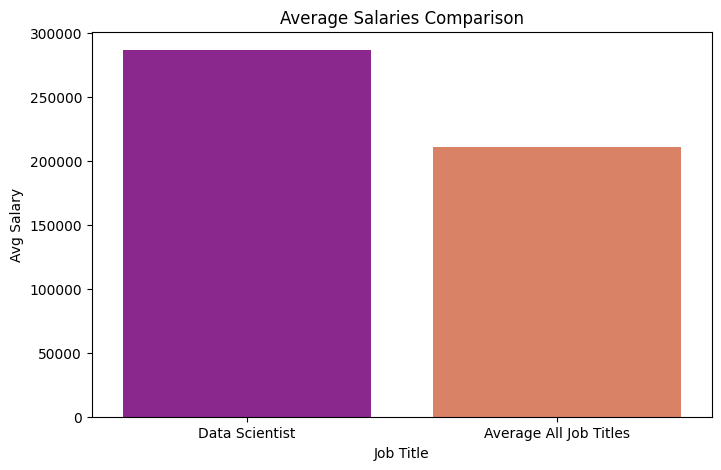

In [23]:
# Paso 1: Calcular la media de salarios de Data Scientists
mean_salary_data_scientist = df[df['job_title'] == 'Data Scientist']['salary'].mean()

# Paso 2: Calcular la media de salarios de todos los títulos de trabajo
mean_salary_all = df['salary'].mean()

# Paso 3: Crear un DataFrame para las medias
salary_comparison = pd.DataFrame({
    'Job Title': ['Data Scientist', 'Average All Job Titles'],
    'Mean Salary': [mean_salary_data_scientist, mean_salary_all]
})

# Paso 4: Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Job Title', y='Mean Salary', data=salary_comparison, palette='plasma')

# Ajustes adicionales
plt.title('Average Salaries Comparison')
plt.xlabel('Job Title')
plt.ylabel('Avg Salary')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.show()

### HOW MANY PEOPLE EARNS >200K?

In [24]:
# Filtrar las personas que ganan más de 200,000 USD y contar el número de filas
above_200k_count = df[df['salary_in_usd'] > 200000].shape[0]
df[df['salary']>200000].shape[0]

450

In [25]:
#otra forma de ejecutarlo
len(df[df['salary']>200000])

450

Visualization: 
With the absolute data in mind, I'd like to see it compared with the rest of the salaries. I make 2 buckets above 200k and bellow 200k to understand better the buckets. 


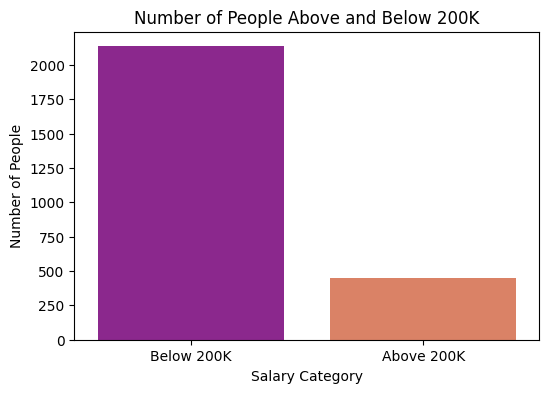

In [26]:
# Crear categorías de salarios
df['salary_category'] = df['salary'].apply(lambda x: 'Above 200K' if x > 200000 else 'Below 200K')

# Contar cuántas personas hay en cada categoría
salary_count = df['salary_category'].value_counts()

# Crear gráfico de barras
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=salary_count.index, y=salary_count.values, palette='plasma')

# Añadir títulos y etiquetas
plt.title('Number of People Above and Below 200K')
plt.xlabel('Salary Category')
plt.ylabel('Number of People')

plt.show()


Now in % with a pie chart

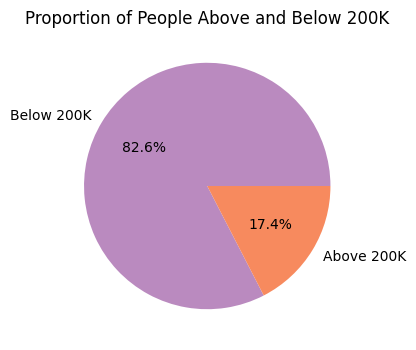

In [27]:
colors = ['#ba8abf', '#f78a5e']  # Rojo claro y azul claro

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(salary_count, labels=salary_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportion of People Above and Below 200K')

plt.show()

###  WHAT IS THE AVG SALARY OF SE DATA MODELER?

In [28]:
df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]['salary_in_usd'].mean()

np.float64(118900.0)

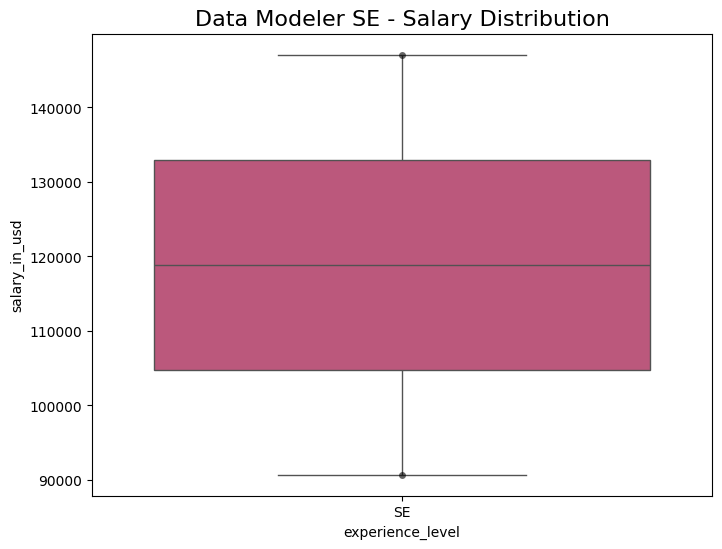

In [29]:
# Filtrar los datos para incluir solo a Data Modeler con experiencia 'SE'
data_modeler_se = df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un boxplot para visualizar la distribución del salario
sns.boxplot(x='experience_level', y='salary_in_usd', data=data_modeler_se, palette='plasma')

# Añadir un swarmplot para mostrar los puntos individuales de los salarios
sns.swarmplot(x='experience_level', y='salary_in_usd', data=data_modeler_se, color='black', alpha=0.6)

# Añadir título y etiquetas
plt.title('Data Modeler SE - Salary Distribution', fontsize=16)

# Mostrar el gráfico
plt.show()


### LOOKING AT ML ENGINEER, WHAT IS THE DIFFENCE OF SALARY BETWEEN FT AND PT?


Solución en código

In [30]:
salary_FT = df[['employment_type', 'salary_in_usd']][df['job_title'] == 'ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type', 'salary_in_usd']][df['job_title'] == 'ML Engineer'].groupby('employment_type').mean().loc['PT']

print(salary_FT - salary_PT) #diferencia en valor absoluto
print((salary_FT-salary_PT) / salary_FT) #me da el porcentaje
print(salary_FT/salary_PT) #me da las veces que gana mas (10 veces mas)

salary_in_usd    152117.9
dtype: float64
salary_in_usd    0.905012
dtype: float64
salary_in_usd    10.527615
dtype: float64


Visualization: boxplot to understand the range of the salaries and and the common touchpoints
Also barplot for an easy visualization

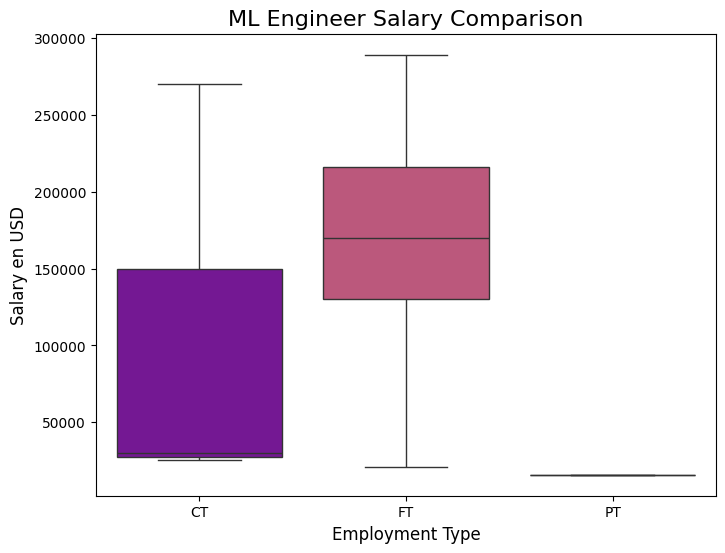

In [31]:
# Filtrar los datos para incluir solo a ML Engineers
ml_engineer = df[df['job_title'] == 'ML Engineer']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear el boxplot para comparar los salarios entre full-time y part-time
sns.boxplot(x='employment_type', y='salary_in_usd', data=ml_engineer, palette='plasma')

# Añadir título y etiquetas
plt.title('ML Engineer Salary Comparison', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Salary en USD', fontsize=12)

# Mostrar el gráfico
plt.show()

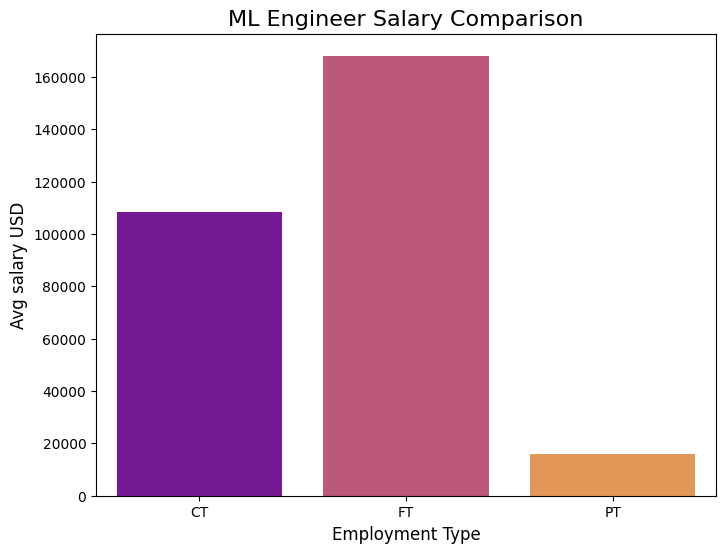

In [32]:
# Calcular el salario promedio por tipo de empleo (full-time vs part-time) para ML Engineers
average_salary_ml = ml_engineer.groupby('employment_type')['salary_in_usd'].mean().reset_index()

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras para comparar el salario promedio entre full-time y part-time
sns.barplot(x='employment_type', y='salary_in_usd', data=average_salary_ml, palette='plasma')

# Añadir título y etiquetas
plt.title('ML Engineer Salary Comparison', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Avg salary USD', fontsize=12)

# Mostrar el gráfico
plt.show()



### WHAT IS THE MOST FREQUENT EMPLOYMENT TYPE FOR BUSINESS DATA ANALYST? 

In [33]:
df[df['job_title'] == 'Data Analyst']['employment_type'].value_counts().head()

employment_type
FT    390
PT      5
CT      1
Name: count, dtype: int64

In [34]:
df[df['job_title'] == 'Data Analyst']['employment_type'].mode()

0    FT
Name: employment_type, dtype: object

In [35]:
Business_Analyst_ET = pd.DataFrame(df[['employment_type','job_title']][df['job_title'] == 'Business Data Analyst'].value_counts()).reset_index()
Business_Analyst_ET

,employment_type,job_title,count
0,FT,Business Data Analyst,14
1,CT,Business Data Analyst,1


Visualization: Piechart to see %

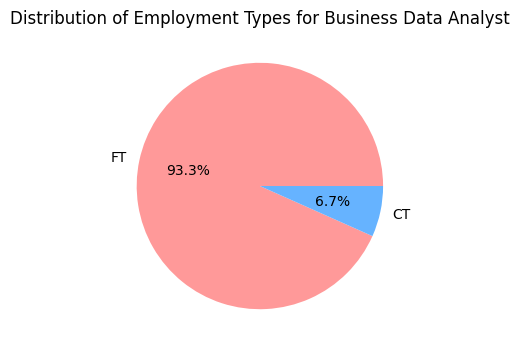

In [36]:
Business_Analyst_ET = df[df['job_title'] == 'Business Data Analyst']['employment_type'].value_counts().reset_index()

# Renombrar las columnas del DataFrame
Business_Analyst_ET.columns = ['employment_type', 'count']  # Asegúrate de que haya dos columnas

# Definir colores personalizados para el gráfico de pastel
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 

# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(Business_Analyst_ET['count'], labels=Business_Analyst_ET['employment_type'], autopct='%1.1f%%', colors=colors)

# Añadir título
plt.title('Distribution of Employment Types for Business Data Analyst')

plt.show()




### LOOKING AT COMPANY LOCATION, WHICH IS THE COUNTRY WITH HIGHER REMOTE WORK RATIO?

In [37]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Below 200K
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Below 200K
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Below 200K
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Below 200K
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Below 200K


In [38]:
remote_per_country = df.groupby(['company_location'])['remote_ratio'].mean().sort_values(ascending=False)
remote_per_country[remote_per_country == 100]

company_location
PL    100.0
KE    100.0
MY    100.0
AR    100.0
PR    100.0
IR    100.0
NG    100.0
EG    100.0
PH    100.0
CR    100.0
SK    100.0
CL    100.0
CF    100.0
Name: remote_ratio, dtype: float64

Visualization: 
As in previous charts, I make a top 20 countries selection to see the higher rates. 
I did changed the country codes with country names for a better visualization

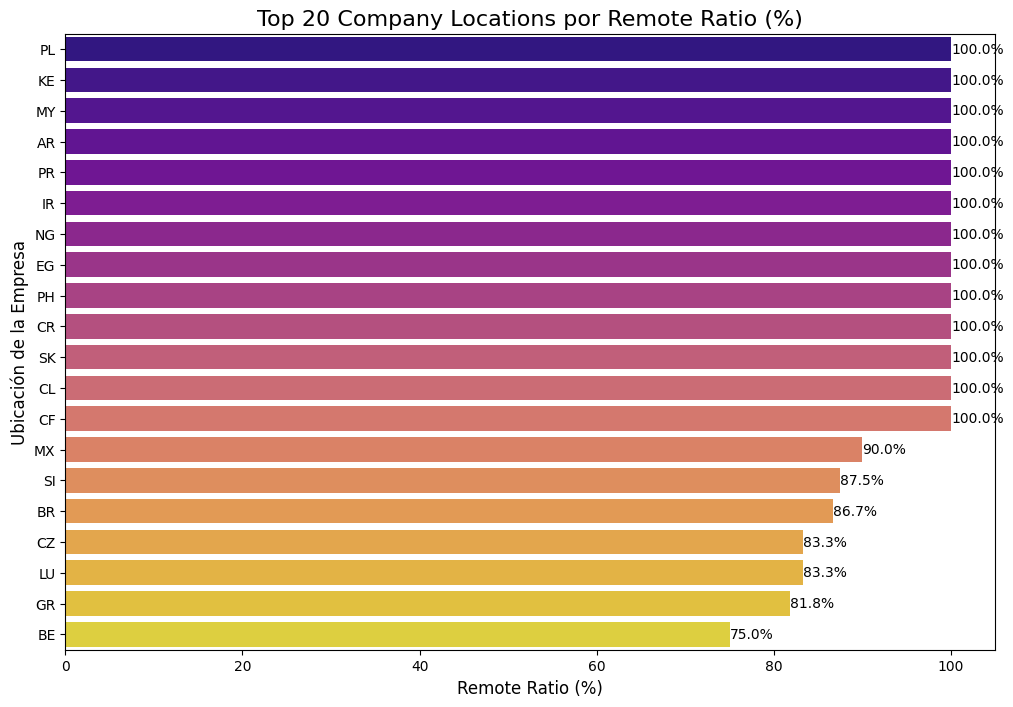

In [39]:
# Agrupar por company_location y calcular el promedio de remote_ratio
remote_ratio_company = df.groupby('company_location')['remote_ratio'].mean().reset_index()

# Renombrar las columnas para mayor claridad
remote_ratio_company.columns = ['company_location', 'average_remote_ratio']

# Ordenar el DataFrame en orden descendente (ahora trabajamos con valores de 0 a 100, no es necesario multiplicar por 100)
remote_ratio_company = remote_ratio_company.sort_values('average_remote_ratio', ascending=False)

# Seleccionar el top 20 de países con mayor remote ratio
top_20_remote_ratio = remote_ratio_company.head(20)

# Crear una figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
sns.barplot(x='average_remote_ratio', y='company_location', data=top_20_remote_ratio, palette='plasma')

# Añadir título y etiquetas
plt.title('Top 20 Company Locations por Remote Ratio (%)', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Ubicación de la Empresa', fontsize=12)

# Añadir los porcentajes a las barras
for index, value in enumerate(top_20_remote_ratio['average_remote_ratio']):
    plt.text(value, index, f'{value:.1f}%', va='center')

# Mostrar el gráfico
plt.show()


In [40]:
# Quiero sacar el nombre de los paises, para que quede más claro
# Extraer los nombres de los países del top 20
top_20_countries = top_20_remote_ratio['company_location'].tolist()

# Mostrar los nombres de los países
print("Top 20 países por remote ratio:")
for country in top_20_countries:
    print(country)


Top 20 países por remote ratio:
PL
KE
MY
AR
PR
IR
NG
EG
PH
CR
SK
CL
CF
MX
SI
BR
CZ
LU
GR
BE


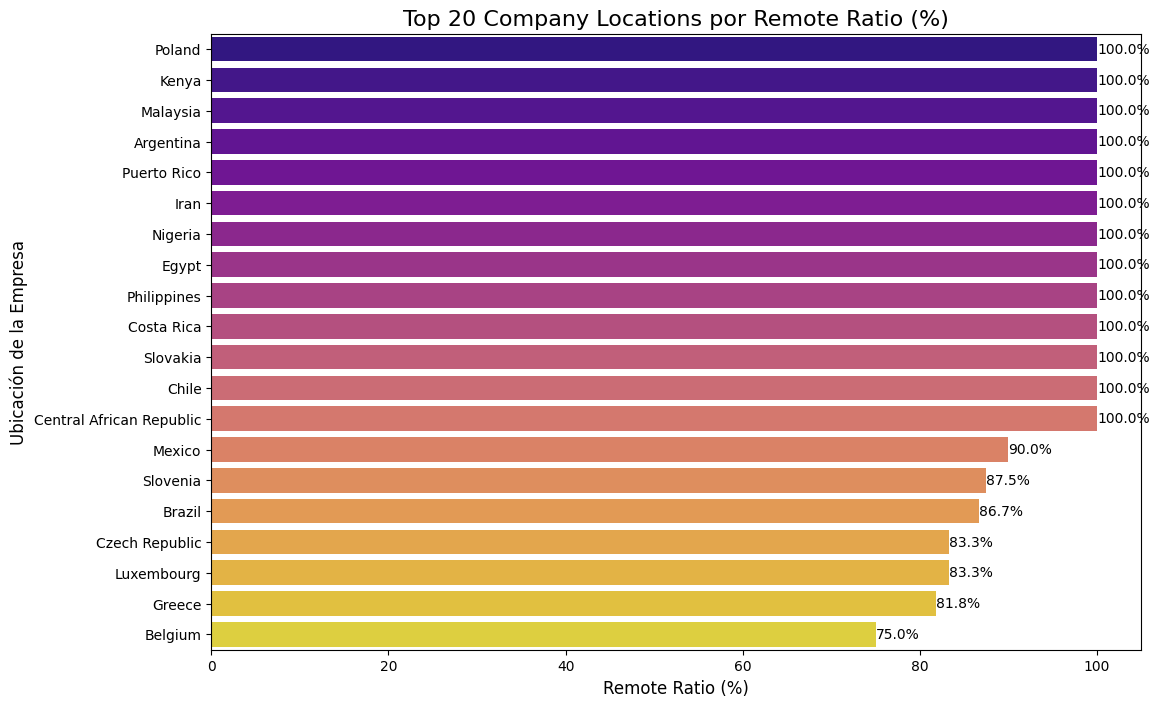

In [41]:
# Diccionario que mapea los códigos de país a sus nombres completos
country_codes = {
    'PL': 'Poland',
    'KE': 'Kenya',
    'MY': 'Malaysia',
    'AR': 'Argentina',
    'PR': 'Puerto Rico',
    'IR': 'Iran',
    'NG': 'Nigeria',
    'EG': 'Egypt',
    'PH': 'Philippines',
    'CR': 'Costa Rica',
    'SK': 'Slovakia',
    'CL': 'Chile',
    'CF': 'Central African Republic',
    'MX': 'Mexico',
    'SI': 'Slovenia',
    'BR': 'Brazil',
    'CZ': 'Czech Republic',
    'LU': 'Luxembourg',
    'GR': 'Greece',
    'BE': 'Belgium'
}

# Reemplazar los códigos de país por nombres completos usando el diccionario
top_20_remote_ratio['company_location'] = top_20_remote_ratio['company_location'].replace(country_codes)

# Crear una figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales con la paleta 'plasma'
sns.barplot(x='average_remote_ratio', y='company_location', data=top_20_remote_ratio, palette='plasma')

# Añadir título y etiquetas
plt.title('Top 20 Company Locations por Remote Ratio (%)', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Ubicación de la Empresa', fontsize=12)

# Añadir los porcentajes a las barras
for index, value in enumerate(top_20_remote_ratio['average_remote_ratio']):
    plt.text(value, index, f'{value:.1f}%', va='center')

# Mostrar el gráfico
plt.show()
